### 1) Preprocessing

In [1]:
import os
import shutil
import shap
import numpy as np
import tensorflow as tf
from keras.utils import image_dataset_from_directory, load_img
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import  Input, Activation, Flatten, Conv2D, MaxPooling2D,  Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy

 1.1) Loading an image dataset from the 'flowers' directory using the image_dataset_from_directory function. It resizes the images to 128x128 pixels and groups them into batches of 32 images each for easier processing.

In [2]:
data = image_dataset_from_directory(
    'flowers',
    image_size=(128, 128),
    batch_size=32 
)

Found 1517 files belonging to 2 classes.


1.2) Labeling the images into arrays and appends them to the respective listsand normalizing the data, and since the pixel values of the images are normalized by dividing by 255.0, scaling the values to the range [0, 1].

In [3]:
images, labels = [], []
for image, label in data:
    images.append(image.numpy())
    labels.append(label.numpy())
images, labels = np.concatenate(images), np.concatenate(labels)
images /= 255.0

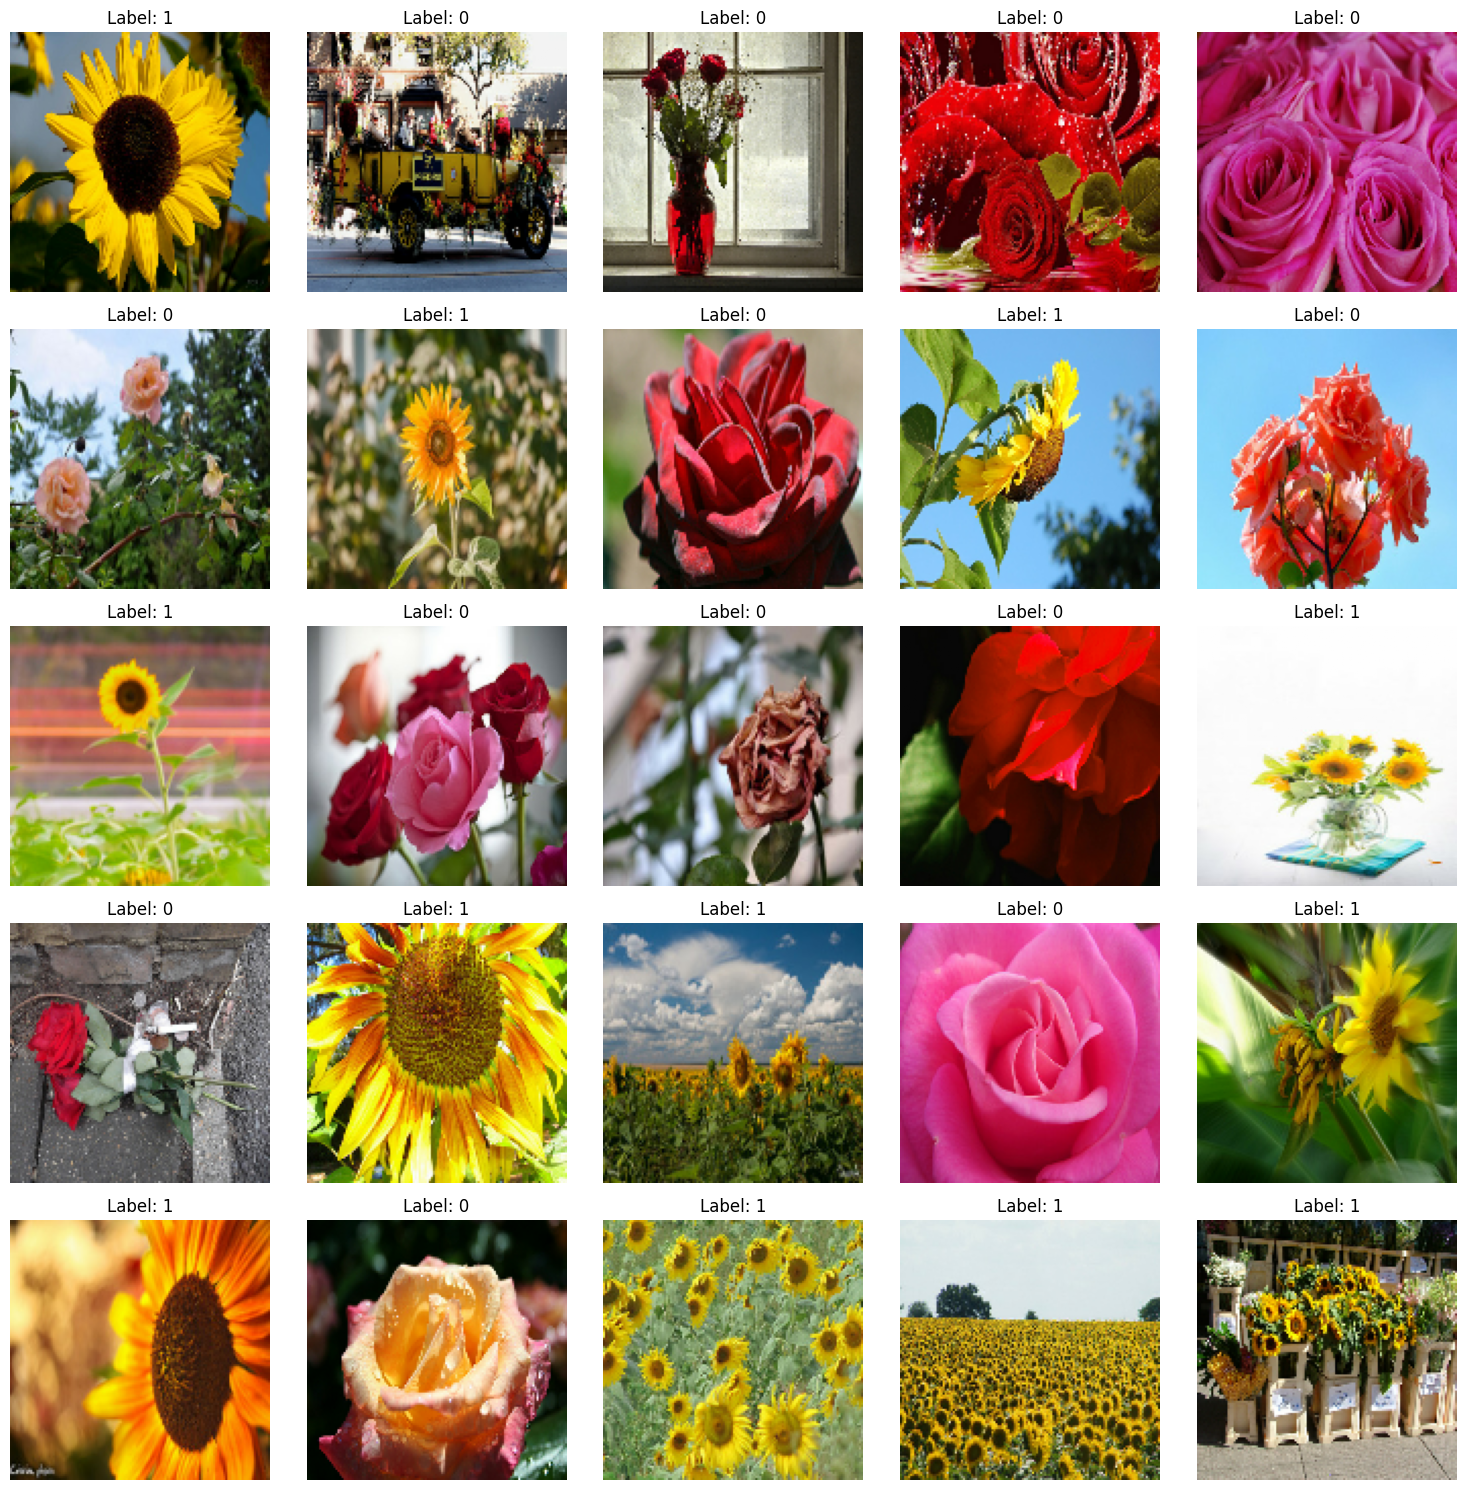

In [4]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
    axes[i].imshow(images[i])
    axes[i].axis('off') 
    axes[i].set_title(f"Label: {labels[i]}")

plt.tight_layout()

### 2) Buidling the model

2.1) Concatenating image and label arrays into training and testing sets using the train_test_split function. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, shuffle=True, random_state=11, stratify=labels)

2.2) Training a convolutional neural network (CNN) for image classification.

**Model Architecture:**
- <u>Input Layer</u>: The model takes input images of shape (128, 128, 3), where 3 represents the RGB color channels.
- <u>Convolutional Layers:</u>
Conv2D layers apply convolution operations, using 32 filters in the first layer and 16 in the second, with a kernel size of 3x3 and ReLU activation.
MaxPooling2D layers downsample the feature maps by a factor of 2.
- <u>Flatten Layer:</u> The output from the convolutional layers is flattened into a 1D vector.
- Dense Layer: A fully connected layer with 3 output units (for 3 classes).
- <u>Softmax Activation:</u>The output layer uses softmax to produce class probabilities.

The model is compiled with the Adam optimizer, and converts the labels to one-hot encoded format for multi-class classification.

The training process uses a batch size of 32, runs for 10 epochs, and uses 15% of the training data for validation.

In [6]:
inputs = Input(shape=(128, 128, 3), name="Input")
x = Conv2D(32, 3, activation="relu", padding='same', name='Conv1')(inputs)
x = MaxPooling2D(2, name='Pool1')(x)
x = Conv2D(16, 3, activation="relu", padding='same', name='Conv2')(x)
x = MaxPooling2D(2, name='Pool2')(x)
x = Flatten(name='Vectorize')(x)
x = Dense(3, name='FC')(x)
outputs = Activation("softmax", name='Softmax')(x)
model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['acc'])
model.summary()

hist = model.fit(
    X_train,
    to_categorical(y_train, 3),
    batch_size=32,
    epochs=10,
    validation_split=0.15,
    shuffle='on'
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Vectorize (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC (Dense)                      │ (None, 3)              │        49,155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Activation)            │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,675 (213.57 KB)

 Trainable params: 54,675 (213.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - acc: 0.7024 - loss: 0.5895 - val_acc: 0.8480 - val_loss: 0.3384
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - acc: 0.8527 - loss: 0.3260 - val_acc: 0.8713 - val_loss: 0.2756
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - acc: 0.8906 - loss: 0.2457 - val_acc: 0.8596 - val_loss: 0.2929
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9251 - loss: 0.2035 - val_acc: 0.8947 - val_loss: 0.2482
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.8978 - loss: 0.2642 - val_acc: 0.9006 - val_loss: 0.2397
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - acc: 0.9433 - loss: 0.1749 - val_acc: 0.9006 - val_loss: 0.2459
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9595 - loss: 0.1256 - val_acc: 0.8889 - val_loss: 0.3127
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - acc: 0.9669 - loss: 0.1084 - val_acc: 0.8538 - val_loss: 0.4298
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - acc: 0.9537

2.3) Evaluating the performance of the trained CNN model on the test

In [7]:
y_hat=model.predict(X_test)
print('Acc=',np.sum(y_hat.argmax(1)==y_test)/y_test.shape[0])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Acc= 0.9289473684210526


### 3) Shap

3.1)  SHAP (SHapley Additive exPlanations) to explain the model's predictions for a specific test image from the dataset. 

- Taking an input x, makes a copy of it, and passes it to the trained model to get predictions.
- Creating a SHAP masker that will generate blurred versions of the input images.

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.69s/it]               


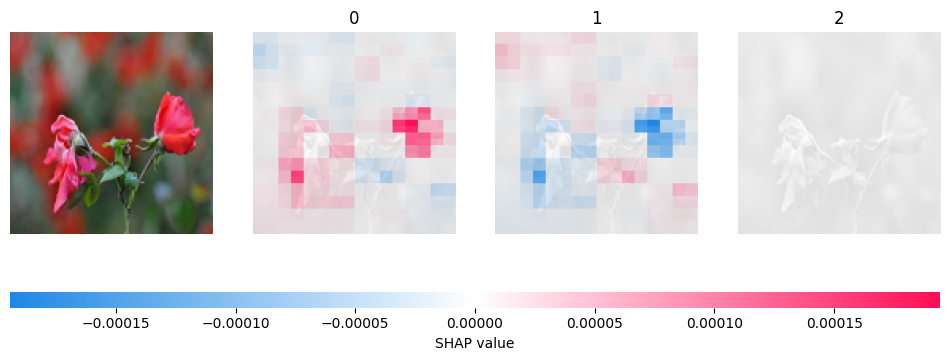

In [8]:
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(128,128)", X_test[0].shape)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(3)))
ind=[311]
shap_values_ = explainer( X_test[ind], max_evals=5000, batch_size=50 )     
shap.image_plot(shap_values_,labels=[0,1,2])

### 4) ProPnet

**Step 1: Feature Extractor (CNN Backbone):**

- Function build_feature_extractor: This function creates a simple CNN model that acts as a feature extractor.

<u>Layers:</u>

- 64 filters with a 3x3 kernel and ReLU activation, followed by max pooling.
- 128 filters with a 3x3 kernel and ReLU activation, followed by max pooling.
- 256 filters with a 3x3 kernel and ReLU activation, followed by max pooling.

<u>Model Creation:</u> The model is defined using Keras' functional API.

**Step 2: Prototype Layer:**
Iitialization of the prototypes as learnable weights and computing the squared L2 distances between the feature maps and the prototypes to create a similarity score (negative distances).


**Step3: Build ProtoPNet:**
Use Feature extraction, the Prototype layers and finally the classifcation layer


**Step4: Model Compilation:**

The ProtoPNet model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as a metric.




In [9]:
input_shape = (128, 128, 3)
num_prototypes = 10  
num_classes = 2     

def build_feature_extractor(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    feature_extractor = models.Model(inputs, x)
    return feature_extractor

class PrototypeLayer(tf.keras.layers.Layer):
    def __init__(self, num_prototypes, prototype_shape):
        super(PrototypeLayer, self).__init__()
        self.prototypes = self.add_weight(shape=(num_prototypes, *prototype_shape), 
                                          initializer='random_normal', trainable=True)

    def call(self, feature_maps):
        feature_maps_exp = tf.expand_dims(feature_maps, axis=1)
        distances = tf.reduce_sum((feature_maps_exp - self.prototypes) ** 2, axis=[-3, -2, -1])
        return -distances 

def build_protoPNet(input_shape, num_prototypes, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    
    feature_extractor = build_feature_extractor(input_shape)
    feature_maps = feature_extractor(inputs)
    
    prototype_shape = feature_maps.shape[1:]
    prototype_layer = PrototypeLayer(num_prototypes, prototype_shape)
    prototype_distances = prototype_layer(feature_maps)
    
    logits = layers.Dense(num_classes, activation=None)(prototype_distances)
    outputs = layers.Activation('softmax')(logits)

    model = models.Model(inputs, outputs)
    return model

protoPNet = build_protoPNet(input_shape, num_prototypes, num_classes)
protoPNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])

protoPNet.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 16, 16, 256)    │       370,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prototype_layer                 │ (None, 10)             │       655,360 │
│ (PrototypeLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,026,198 (3.91 MB)

 Trainable params: 1,026,198 (3.91 MB)

 Non-trainable params: 0 (0.00 B)

**Step5: One-Hot Encoding of Labeling:**

Converts the training labels (y_train) into one-hot encoded format for multi-class classification. 

**Step6: Model Training**

**Step4: Model Compilation**

In [10]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

protoPNet.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.15)

test_loss, test_acc = protoPNet.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 621ms/step - accuracy: 0.5159 - loss: 8.1581 - val_accuracy: 0.6316 - val_loss: 0.8440
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 596ms/step - accuracy: 0.7520 - loss: 0.5576 - val_accuracy: 0.8947 - val_loss: 0.2778
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 612ms/step - accuracy: 0.8189 - loss: 0.5391 - val_accuracy: 0.7076 - val_loss: 1.3320
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 610ms/step - accuracy: 0.8499 - loss: 0.5558 - val_accuracy: 0.6725 - val_loss: 0.9169
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 627ms/step - accuracy: 0.8783 - loss: 0.3101 - val_accuracy: 0.8772 - val_loss: 0.2622
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 599ms/step - accuracy: 0.9026 - loss: 0.2228 - val_accuracy: 0.7076 - val_loss: 0.9759
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 617ms/step - accuracy: 0.8277 - loss: 0.5055 - val_accuracy: 0.8480 - val_loss: 0.3518
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 607ms/step - accuracy: 0.9172 - loss: 0.2016 - val_accu

Visualization the prototypes learned by the ProtoPNet model alongside an example input image. By averaging the prototype over its color channels, the prototype can be represented in a format suitable for visualization, helping to understand what features the model has identified as important for classification

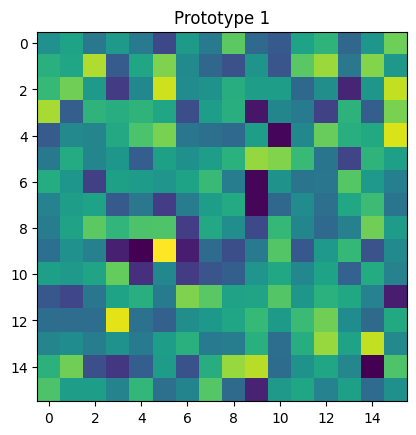

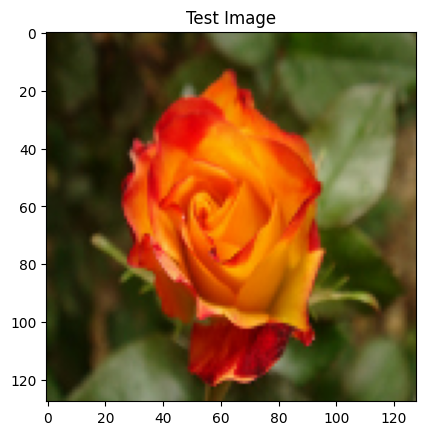

In [11]:
prototypes = protoPNet.layers[2].prototypes.numpy()
prototype_image = np.mean(prototypes[0], axis=-1)  

plt.imshow(prototype_image, cmap='viridis')
plt.title("Prototype 1")
plt.show()

example_image = X_test[0]
plt.imshow(example_image)
plt.title("Test Image")
plt.show()


Epoch 1, Loss: 0.3773955093010476
Test Accuracy after Epoch 1: 90.46%
Epoch 2, Loss: 0.23325341047817155
Test Accuracy after Epoch 2: 92.11%
Epoch 3, Loss: 0.19464921970900737
Test Accuracy after Epoch 3: 90.79%
Epoch 4, Loss: 0.17154586432795776
Test Accuracy after Epoch 4: 91.78%
Epoch 5, Loss: 0.12232350714896854
Test Accuracy after Epoch 5: 91.12%
Epoch 6, Loss: 0.08984757028520107
Test Accuracy after Epoch 6: 90.79%
Epoch 7, Loss: 0.07658059473492597
Test Accuracy after Epoch 7: 92.11%
Epoch 8, Loss: 0.062332195082777424
Test Accuracy after Epoch 8: 91.12%
Epoch 9, Loss: 0.039941621258070596
Test Accuracy after Epoch 9: 90.13%
Epoch 10, Loss: 0.030657012995920684
Test Accuracy after Epoch 10: 90.13%


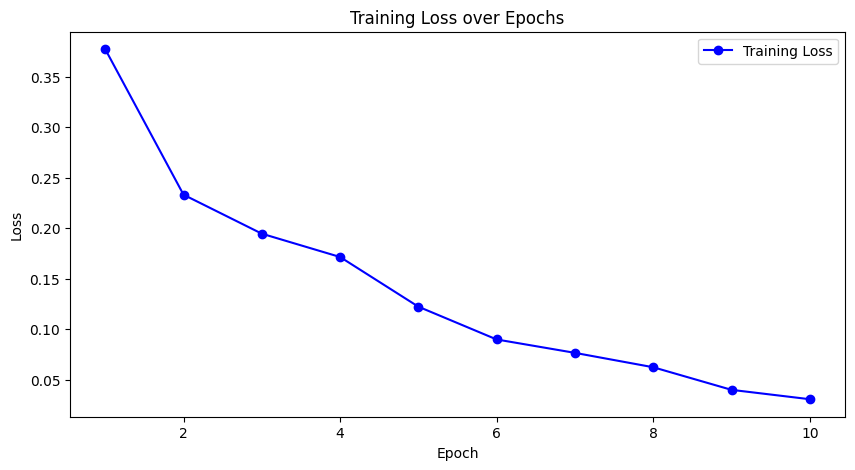

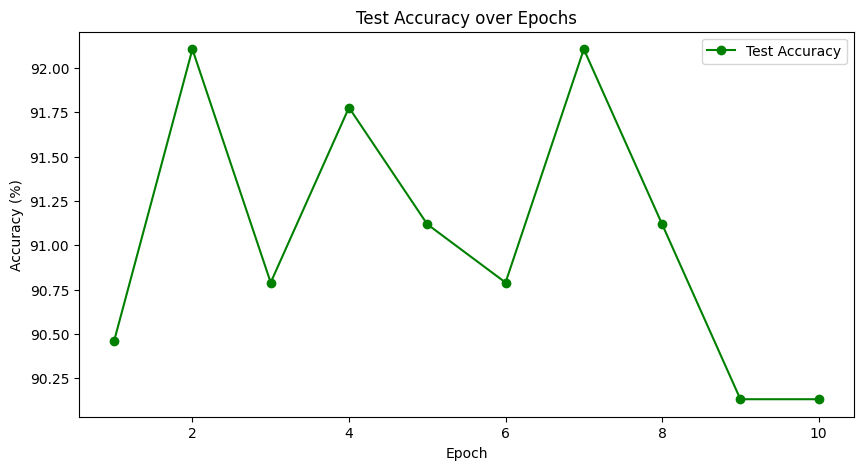

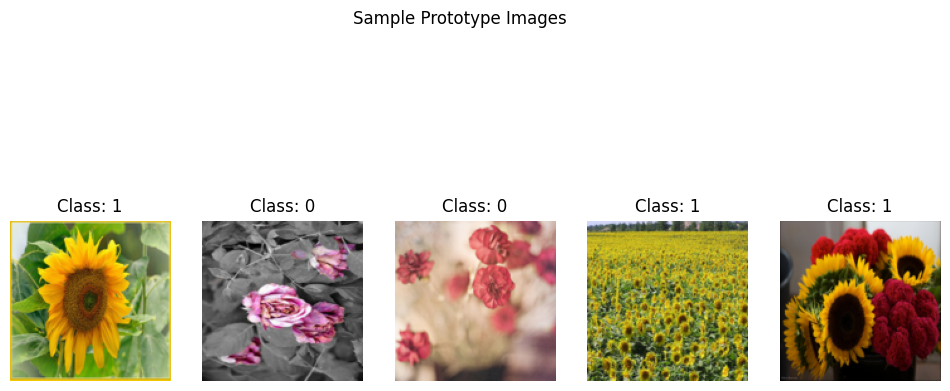

In [13]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Define data transforms and load the full dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root='flowers', transform=transform)

# 2. Split dataset into train and test sets using indices
train_indices, test_indices = train_test_split(
    np.arange(len(dataset)),
    test_size=0.2,
    stratify=dataset.targets,
    random_state=11
)

train_data = Subset(dataset, train_indices)
test_data = Subset(dataset, test_indices)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# 3. Define a simple ProtoPNet model architecture
class SimpleProtoPNet(nn.Module):
    def __init__(self, num_prototypes, num_classes):
        super(SimpleProtoPNet, self).__init__()
        # Backbone structure
        self.backbone = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16 * 32 * 32, num_classes)
        )
        self.num_prototypes = num_prototypes
        self.num_classes = num_classes

    def forward(self, x):
        return self.backbone(x)

# Instantiate the model
num_prototypes = 5  # Number of prototypes per class; you can adjust this
num_classes = len(dataset.classes)  # 2 for rose and sunflower
model = SimpleProtoPNet(num_prototypes=num_prototypes, num_classes=num_classes)

# 4. Set up training elements
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# To record loss and accuracy for plotting
train_losses = []
test_accuracies = []

# 5. Training the ProtoPNet model
for epoch in range(10):  # 10 epochs to match the previous setup
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)
    print(f"Epoch {epoch+1}, Loss: {average_loss}")

    # Evaluate on the test set after each epoch
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f"Test Accuracy after Epoch {epoch+1}: {accuracy:.2f}%")

# Plot Training Loss over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_losses, marker='o', color='b', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plot Test Accuracy over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), test_accuracies, marker='o', color='g', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()

# 6. Prototype Assignment (Example placeholder for pushing prototypes)
def push_prototypes(model, train_loader):
    model.eval()
    # This is an example placeholder; actual implementation will differ based on library support
    # You would store feature vectors closest to each prototype here
    # To display images for prototypes, you could pick representative examples from each class

# Call prototype assignment function
push_prototypes(model, train_loader)

# Example: Displaying random samples as prototype placeholders (for real prototype images)
def display_prototype_images(loader, num_images=5):
    images, labels = next(iter(loader))
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].permute(1, 2, 0) * 0.5 + 0.5)  # Unnormalize for display
        plt.title(f"Class: {labels[i].item()}")
        plt.axis('off')
    plt.suptitle('Sample Prototype Images')
    plt.show()

# Display sample images from train_loader as prototype placeholders
display_prototype_images(train_loader)


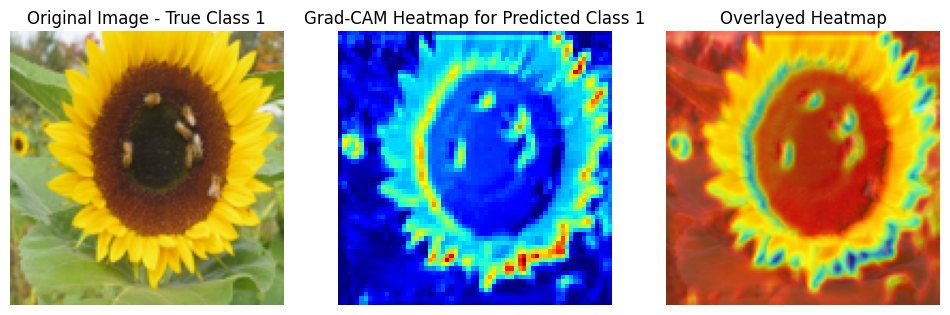

In [15]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms.functional import normalize

# Grad-CAM function to generate heatmaps for ProtoPNet predictions
# Updated Grad-CAM function to generate heatmaps
def generate_gradcam_heatmap(model, image, target_class):
    # Set the model to evaluation mode
    model.eval()
    image = image.unsqueeze(0)  # Add batch dimension
    image.requires_grad = True  # Ensure gradient tracking

    # Identify the last conv layer; adjust layer index as needed
    conv_layer = model.backbone[3]  # Assuming layer[3] is the last conv layer

    # Get the conv output by registering a hook
    conv_output = None
    def hook_fn(module, input, output):
        nonlocal conv_output
        conv_output = output
        output.retain_grad()  # Retain gradients for this layer

    # Register the hook
    handle = conv_layer.register_forward_hook(hook_fn)

    # Forward pass to get the output for target_class
    output = model(image)
    pred = output[0][target_class]
    
    # Backward pass to calculate gradients for target_class
    model.zero_grad()
    pred.backward()

    # Retrieve gradients for the conv layer output
    gradients = conv_output.grad[0].cpu().numpy()
    conv_output = conv_output[0].cpu().detach().numpy()

    # Pool gradients across channels
    pooled_gradients = np.mean(gradients, axis=(1, 2))

    # Weight the channels in feature map by the pooled gradients
    for i in range(conv_output.shape[0]):
        conv_output[i, :, :] *= pooled_gradients[i]

    # Generate heatmap
    heatmap = np.mean(conv_output, axis=0)
    heatmap = np.maximum(heatmap, 0)  # ReLU to keep positive activations
    heatmap /= np.max(heatmap)  # Normalize between 0 and 1

    # Remove the hook to avoid unintended memory usage
    handle.remove()
    return heatmap


# Function to overlay heatmap on image
def overlay_heatmap(heatmap, image, alpha=0.6, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    overlayed_image = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)
    return overlayed_image

# Select a test image and generate Grad-CAM
def show_gradcam_on_test_image(model, test_loader, target_class):
    images, labels = next(iter(test_loader))
    test_image = images[0]  # Select the first image
    label = labels[0].item()

    # Forward pass to predict
    model.eval()
    with torch.no_grad():
        pred = model(test_image.unsqueeze(0)).argmax(1).item()

    # Generate Grad-CAM heatmap for the predicted class
    heatmap = generate_gradcam_heatmap(model, test_image, pred)

    # Prepare original and overlayed images for display
    original_image = test_image.permute(1, 2, 0).numpy() * 0.5 + 0.5  # Unnormalize
    original_image = (original_image * 255).astype(np.uint8)
    heatmap_image = overlay_heatmap(heatmap, original_image)

    # Display original image, heatmap, and overlay
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title(f"Original Image - True Class {label}")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title(f"Grad-CAM Heatmap for Predicted Class {pred}")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(heatmap_image)
    plt.title("Overlayed Heatmap")
    plt.axis('off')
    plt.show()

show_gradcam_on_test_image(model, test_loader, target_class=1)
